## Fine calculation of GURT dipole fluctuation sensitivity

The full formula for sensitivity calculation:
$$
\Delta S = K_S\ \frac{2\ k_B\ T_{\text{ext}}}{A_{\text{eff}}\ \sqrt{\Delta t \cdot \Delta f}} \cdot \Big( 1 + \frac{T_{\text{int}}}{T_{\text{ext}}} \Big) = K_S\ \frac{2\ k_B\ T_{\text{sys}}}{A_{\text{eff}}\ \sqrt{\Delta t \cdot \Delta f}} = K_S\ \frac{SEFD}{ \sqrt{\Delta t \cdot \Delta f}}
$$

$T_{\text{sys}}$ - system noise temperature (sum of internal and external noise), $T_{\text{sys}} = T_{\text{ext}} + T_{\text{int}} = T_{\text{ext}} \cdot (1 + \frac{T_{\text{int}}}{T_{\text{ext}}}) $. Usually at low frequencies considered as $T_{\text{sys}} = T_{\text{ext}}$ because for good telescope $T_{\text{ext}} >> T_{\text{int}}$
<br>
$T_{\text{ext}}$ - temperature of external noise (sky noise temperature at passive dipole output)
<br>
$T_{\text{int}}$ - internal (self) noise of the system (we use antenna amplifier noise in short circuit mode delivered to receiver)
<br>
$K_S\ $ - sensitivity constans, which differs for various receivers types (for compensation receiver $K_S\ = 1 $, see Kraus G. D. Radio astronomy, russian edition pp. 99, 244)
<br>
<br>
Sytem Equivalent Flux Density, Jy:
$$
SEFD = \frac{k_B\ (T_{\text{int}} + T_{\text{ext}})}{\eta\ \chi\ A_{\text{eff}}} 
$$
<br>
Sky noise dominance:
$$
SND = \frac{T_{\text{ext}}} {T_{\text{int}}}
$$
<br>
$k_B$ - Boltzmann constant
<br>
$A_{\text{eff}}$ - effective area of dipole itself. In IEEE and other foreign standards antenna effective area includes effective area of dipole itself, mismatch coefficient of signal path and efficiency of dipole and signal path. Here we give these values separately to show their contribution to total sensitivity value. 
<br>
$\eta$ - efficiency of dipole and signal path
<br>
$\chi$ - mismatch coefficient of signal path
<br>
$\Delta t$ - temporal resolution (integration time)
<br>
$\Delta f$ - spectral rsolution (integration frequency channel width)


Importing Python libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pylab

Setting constants and variables

In [2]:
freq = np.linspace(5, 80, 76)    # Frequency, MHz
c = 299792458                    # Speed of light, m/s
kB = 1.38064852 * pow(10,-23)    # Boltzmann constant, W * m-2 * Hz-1 * sr-1

Setting the temporal and spectral resolutions 

In [3]:
dt = 0.1                         # Temporal resolution, seconds
df = 9765                        # Spectral resolution, Hz

### Galactic part of background radiation intensity 
(H.V. Cane, Non-thermal galactic background radiation, Ph.D. Thesis, University of Tasmania, 1977)

In [4]:
Igal = 2.48*pow(10,-20)*pow(freq,-0.52)*(1-np.exp(-5*pow(freq,-2.1)))/(5*pow(freq,-2.1))

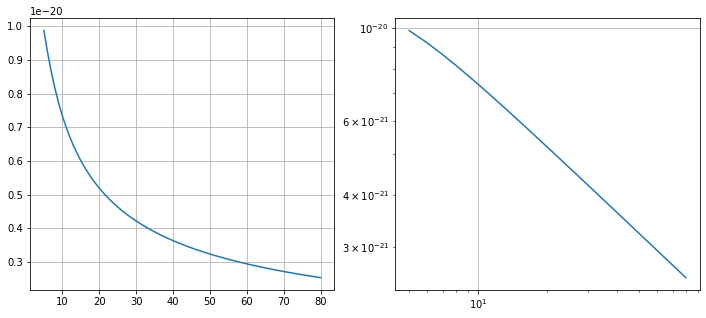

In [5]:
fig = plt.figure(facecolor = 'white', figsize = (12,5))
plt.subplot(121)
plt.plot(freq, Igal)
plt.grid(True)
plt.subplot(122)
plt.loglog(freq, Igal)
plt.grid(True)

### Extragalactic part of background radiation intensity 
(H.V. Cane, Non-thermal galactic background radiation, Ph.D. Thesis, University of Tasmania, 1977)

In [6]:
Iexgal = 1.06*pow(10,-20)*pow(freq,-0.8)*np.exp(-5*pow(freq,-2.1))

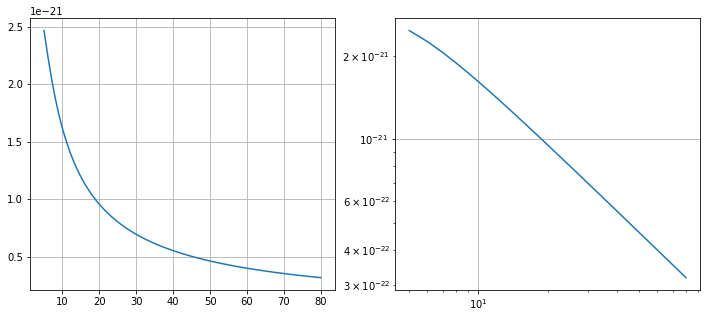

In [7]:
fig = plt.figure(facecolor = 'white', figsize = (12,5))
plt.subplot(121)
plt.plot(freq, Iexgal)
plt.grid(True)
plt.subplot(122)
plt.loglog(freq, Iexgal)
plt.grid(True)

### Comparison of Galactic and Extragalctic parts of background radiation intensity
(H.V. Cane, Non-thermal galactic background radiation, Ph.D. Thesis, University of Tasmania, 1977)

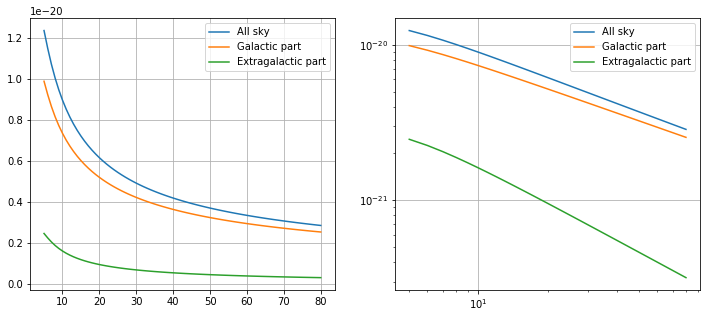

In [8]:
fig = plt.figure(facecolor = 'white', figsize = (12,5))
plt.subplot(121)
plt.plot (freq, Iexgal + Igal, label = 'All sky')
plt.plot (freq, Igal, label = 'Galactic part')
plt.plot (freq, Iexgal, label = 'Extragalactic part')
plt.legend(loc = 'upper right') 
plt.grid(True)

plt.subplot(122)
plt.loglog (freq, Iexgal + Igal, label = 'All sky')
plt.loglog (freq, Igal, label = 'Galactic part')
plt.loglog (freq, Iexgal, label = 'Extragalactic part')
plt.legend(loc = 'upper right')
plt.grid(True)

plt.show()

### Comparison of background noise temperature by Cane and Krymkin
Tbg_Cane - (H.V. Cane, Non-thermal galactic background radiation, Ph.D. Thesis, University of Tasmania, 1977)
Tbg_Krymkin - V.V. Krymkin, “The spectrum of background low frequency radio emission,” Radiophys. Quantum Electron., vol. 14, no. 2, pp. 161–164, 1971.

In [9]:
Tbg_Cane = (Iexgal + Igal) * pow(c, 2) / (2 * pow(freq*1000000, 2) * kB)
Tbg_Krymkin = 3.78*pow(10,5) * pow((10/freq), 2.56)

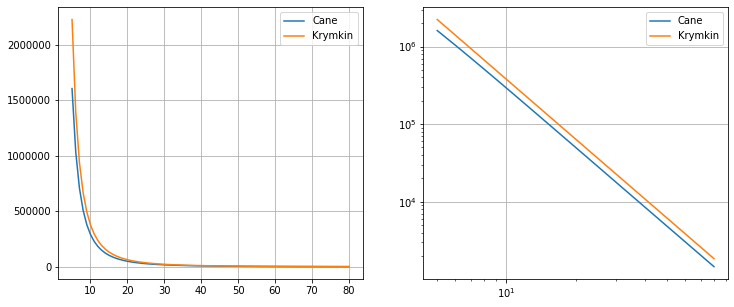

In [10]:
fig = plt.figure(facecolor = 'white', figsize = (12,5))
plt.subplot(121)
plt.plot(freq, Tbg_Cane, label = 'Cane')
plt.plot(freq, Tbg_Krymkin, label = 'Krymkin')
plt.legend(loc = 'upper right')
plt.grid(True)

plt.subplot(122)
plt.loglog(freq, Tbg_Cane, label = 'Cane')
plt.loglog(freq, Tbg_Krymkin, label = 'Krymkin')
plt.legend(loc = 'upper right')
plt.grid(True)
plt.show()

### Reading of GURT dipole simulations results from TXT file

In [11]:
Aeff0 = []; AeffMax = []; Efficiency = []
file = open('DATA/V325 Ae+Eff.txt', 'r')
for line in file:                        # Loop by all lines in file
    words_in_line = line.split()
    Aeff0.append(float(words_in_line[1]))
    AeffMax.append(float(words_in_line[2]))
    Efficiency.append(float(words_in_line[3]))
Aeff0 = np.array(Aeff0); AeffMax = np.array(AeffMax); Efficiency = np.array(Efficiency)

### Effective area of GURT dipole to zenith and to direction of maximal gain

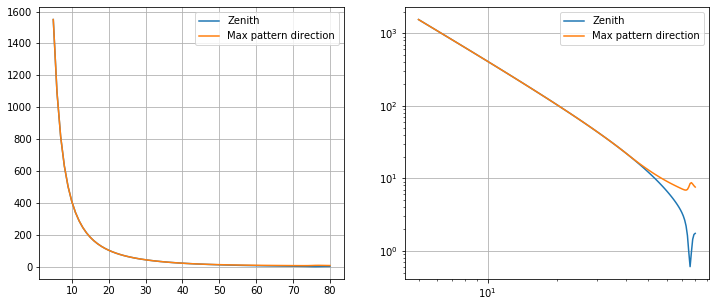

In [12]:
fig = plt.figure(facecolor = 'white', figsize = (12,5))
plt.subplot(121)
plt.plot(freq, Aeff0, label = 'Zenith')
plt.plot(freq, AeffMax, label = 'Max pattern direction')
plt.legend(loc = 'upper right')
plt.grid(True)

plt.subplot(122)
plt.loglog(freq, Aeff0, label = 'Zenith')
plt.loglog(freq, AeffMax, label = 'Max pattern direction')
plt.legend(loc = 'upper right')
plt.grid(True)
plt.show()

### Efficiency of GURT dipole

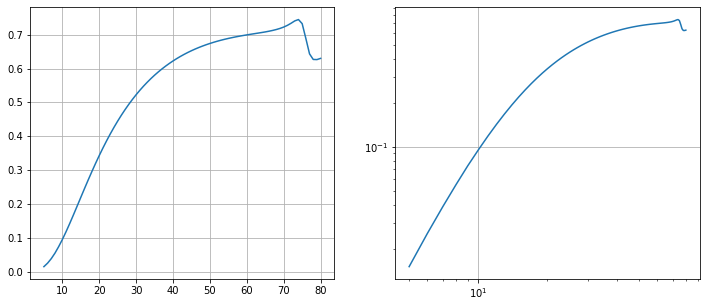

In [13]:
fig = plt.figure(facecolor = 'white', figsize = (12,5))
plt.subplot(121)
plt.plot(freq, Efficiency)
plt.grid(True)

plt.subplot(122)
plt.loglog(freq, Efficiency)
plt.grid(True)
plt.show()

### Effective area of GURT dipole multiplyed by efficiency

In [14]:
Aeff0_tot = Aeff0 * Efficiency

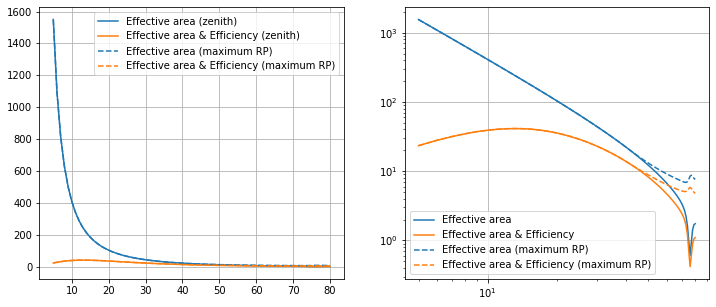

In [15]:
fig = plt.figure(facecolor = 'white', figsize = (12,5))
plt.subplot(121)
plt.plot(freq, Aeff0, label = 'Effective area (zenith)')
plt.plot(freq, Aeff0_tot, label = 'Effective area & Efficiency (zenith)')
plt.plot(freq, AeffMax, label = 'Effective area (maximum RP)', linestyle='--', color = '#1f77b4')
plt.plot(freq, AeffMax * Efficiency, label = 'Effective area & Efficiency (maximum RP)', linestyle='--', color = '#ff7f0e')

plt.legend(loc = 'upper right')
plt.grid(True)

plt.subplot(122)
plt.loglog(freq, Aeff0, label = 'Effective area')
plt.loglog(freq, Aeff0_tot, label = 'Effective area & Efficiency')
plt.loglog(freq, AeffMax, label = 'Effective area (maximum RP)', linestyle='--', color = '#1f77b4')
plt.loglog(freq, AeffMax * Efficiency, label = 'Effective area & Efficiency (maximum RP)', linestyle='--', color = '#ff7f0e')
plt.legend(loc = 'lower left')
plt.grid(True)
plt.show()

### Reading SEFD and calculated mismatch factor

In [16]:
SEFD = []; MismatchFactor_dB = []
file = open('DATA/SEFDu(f).txt', 'r')
for line in file:                        # Loop by all lines in file
    words_in_line = line.split()
    SEFD.append(float(words_in_line[1]))                # in kJy
    MismatchFactor_dB.append(float(words_in_line[2]))   # in dB
SEFD = np.array(SEFD); MismatchFactor_dB = np.array(MismatchFactor_dB)

Converting mismatch factor from dB to relative units

In [17]:
MismatchFactor = np.power(10,MismatchFactor_dB/10)

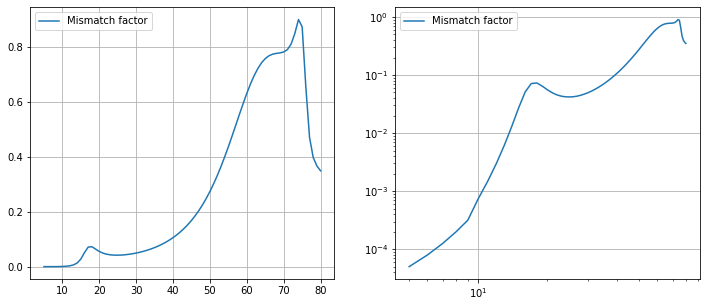

In [18]:
fig = plt.figure(facecolor = 'white', figsize = (12,5))
plt.subplot(121)
plt.plot(freq, MismatchFactor, label = 'Mismatch factor')
plt.grid(True)
plt.legend(loc = 'upper left')

plt.subplot(122)
plt.loglog(freq, MismatchFactor, label = 'Mismatch factor')
plt.grid(True)
plt.legend(loc = 'upper left')
plt.show()

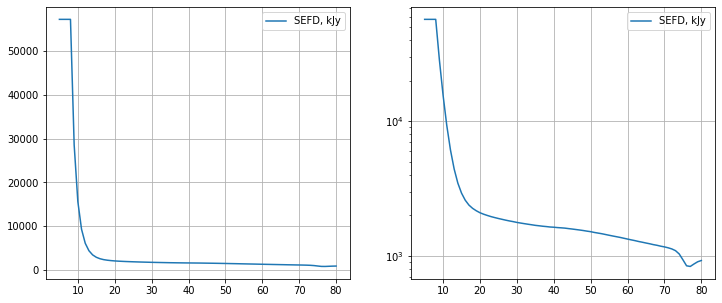

In [19]:
fig = plt.figure(facecolor = 'white', figsize = (12,5))
plt.subplot(121)
plt.plot(freq, SEFD, label = 'SEFD, kJy')
plt.grid(True)
plt.legend(loc = 'upper right')

plt.subplot(122)
plt.semilogy(freq, SEFD, label = 'SEFD, kJy')
plt.grid(True)
plt.legend(loc = 'upper right')
plt.show()

### Effective area with mismatch factor and efficiency (according to IEEE standard)

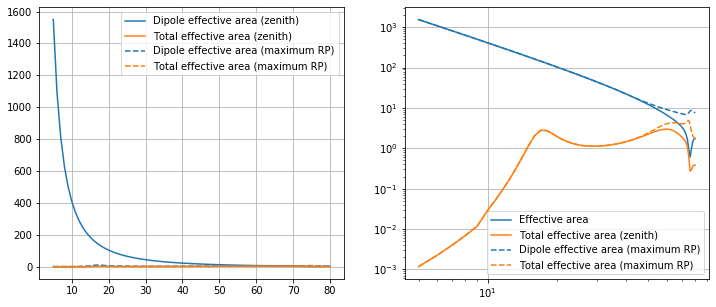

In [20]:
fig = plt.figure(facecolor = 'white', figsize = (12,5))
plt.subplot(121)
plt.plot(freq, Aeff0, label = 'Dipole effective area (zenith)')
plt.plot(freq, Aeff0_tot*MismatchFactor, label = 'Total effective area (zenith)')
plt.plot(freq, AeffMax*MismatchFactor, label = 'Dipole effective area (maximum RP)', linestyle='--', color = '#1f77b4')
plt.plot(freq, AeffMax*Efficiency*MismatchFactor, label = 'Total effective area (maximum RP)', linestyle='--', color = '#ff7f0e')

plt.legend(loc = 'upper right')
plt.grid(True)

plt.subplot(122)
plt.loglog(freq, Aeff0, label = 'Effective area')
plt.loglog(freq, Aeff0_tot*MismatchFactor, label = 'Total effective area (zenith)')
plt.loglog(freq, AeffMax, label = 'Dipole effective area (maximum RP)', linestyle='--', color = '#1f77b4')
plt.loglog(freq, AeffMax * Efficiency * MismatchFactor, label = 'Total effective area (maximum RP)', linestyle='--', color = '#ff7f0e')
plt.legend(loc = 'lower right')
plt.grid(True)
plt.show()

### Reading data of GURT dipole noise measurements

In [21]:
freqLong = []; SkyNoise = []; ShortNoise = []
file = open('DATA/Dipole_noise.txt', 'r')
for line in file:                        # Loop by all lines in file
    words_in_line = line.split()
    freqLong.append(float(words_in_line[0].replace(',','.')))
    SkyNoise.append(float(words_in_line[1].replace(',','.')))
    ShortNoise.append(float(words_in_line[2].replace(',','.')))
freqLong = np.array(freqLong) 
SkyNoise = np.array(SkyNoise)
ShortNoise = np.array(ShortNoise)

Calculation of reduced data in 1 MHz step (search for min value in step)

In [22]:
SkyNoiseNew = np.zeros(80)
ShortNoiseNew = np.zeros(80)
for freqNew in range(80):
    tempSkyNoise = []
    tempShortNoise = []
    for i in range(len(freqLong)):
        if freqLong[i]<freqNew+1 and freqLong[i]>=freqNew:
            tempSkyNoise.append(SkyNoise[i])
            tempShortNoise.append(ShortNoise[i])
    SkyNoiseNew[freqNew] = np.min(tempSkyNoise)
    ShortNoiseNew[freqNew] = np.min(tempShortNoise)
    del tempSkyNoise, tempShortNoise
freqNew = np.linspace(0, 80, 80)

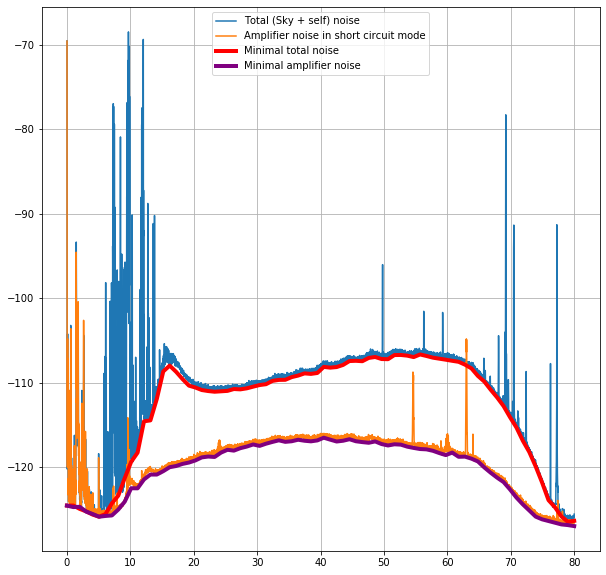

In [23]:
plt.figure(facecolor = 'white', figsize = (10,10))
plt.plot(freqLong, SkyNoise, label = 'Total (Sky + self) noise')
plt.plot(freqLong, ShortNoise, label = 'Amplifier noise in short circuit mode')
plt.plot(freqNew, SkyNoiseNew, linewidth = '4.0', color = 'red', label = 'Minimal total noise')
plt.plot(freqNew, ShortNoiseNew, linewidth = '4.0', color = 'purple', label = 'Minimal amplifier noise')
plt.legend(loc = 'upper center')
plt.grid(True)

In [24]:
SkyNoiseNew = SkyNoiseNew[4:80]
ShortNoiseNew = ShortNoiseNew[4:80]

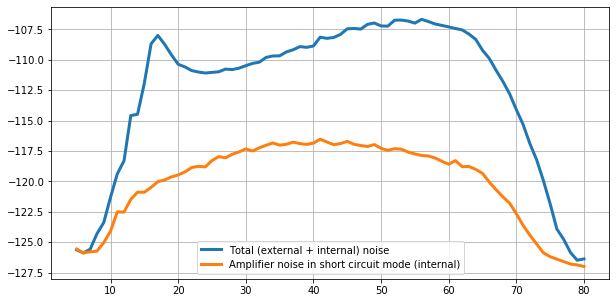

In [25]:
plt.figure(facecolor = 'white', figsize = (10,5))
plt.plot(freq, SkyNoiseNew, linewidth = '3.0', label = 'Total (external + internal) noise')
plt.plot(freq, ShortNoiseNew, linewidth = '3.0', label = 'Amplifier noise in short circuit mode (internal)')
plt.legend(loc = 'lower center')
plt.grid(True)

In [26]:
SND_dB = SkyNoiseNew - ShortNoiseNew
SND = np.power(10,SND_dB/10)

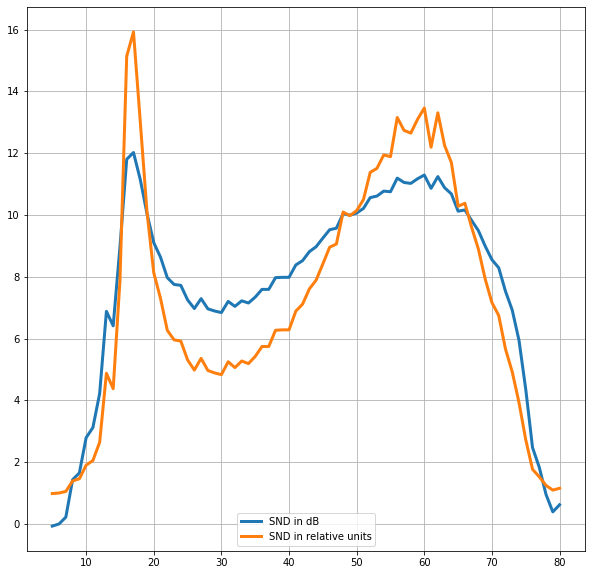

In [27]:
plt.figure(facecolor = 'white', figsize = (10,10))
plt.plot(freq, SND_dB, linewidth = '3.0', label = 'SND in dB')
plt.plot(freq, SND, linewidth = '3.0', label = 'SND in relative units')
plt.legend(loc = 'lower center')
plt.grid(True)

In [28]:
NoiseFactor = (1 + 1/SND)

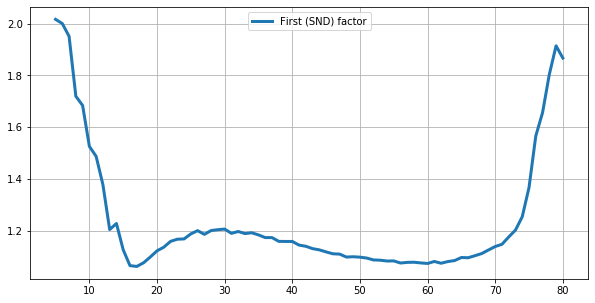

In [29]:
plt.figure(facecolor = 'white', figsize = (10,5))
plt.plot(freq, NoiseFactor, linewidth = '3.0', label = 'First (SND) factor')
plt.legend(loc = 'upper center')
plt.grid(True)

### Fluctuation sensitivity

$$
\Delta S = \frac{2\ k_B\ T_{\text{ext}}}{A_{\text{eff}}\ \sqrt{\Delta t \cdot \Delta f}} \cdot \Big( 1 + \frac{T_{\text{int}}}{T_{\text{ext}}} \Big)
$$

Full formula that accounts for contributions of all parameters 

In [30]:
dS = NoiseFactor * Tbg_Cane * 2 * kB / (Aeff0 * pow(dt * df, 0.5))

Calculations of sensitivity when one or more factors are taken approximately

In [31]:
dS_rough = np.zeros(len(freq))
dS_rough[:] = 10000*2*kB / (350 * pow(dt * df, 0.5))
dS_BG = Tbg_Cane*2*kB / (350 * pow(dt * df, 0.5) )
dS_Ae = 10000*2*kB / (Aeff0 * pow(dt * df, 0.5))
dS_AB = Tbg_Cane*2*kB / (Aeff0 * pow(dt * df, 0.5))
dS_NN = 1 * Tbg_Cane * 2 * kB / (Aeff0 * Efficiency * pow(dt * df, 0.5))
dS_Max = NoiseFactor * Tbg_Cane * 2 * kB / (AeffMax * pow(dt * df, 0.5))
dS_SEFD = SEFD / (pow(dt * df, 0.5))

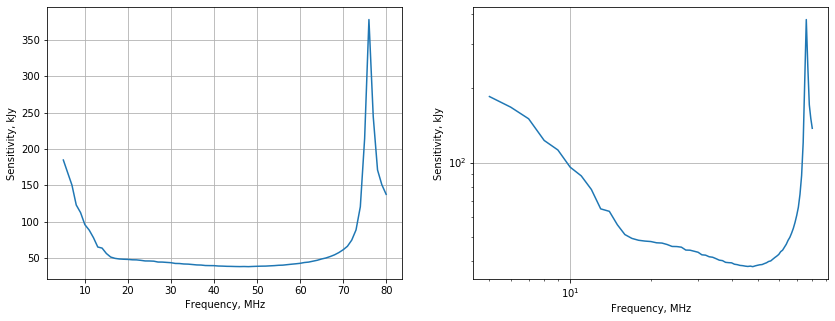

In [32]:
fig, ax = plt.subplots(1,2, facecolor = 'white', figsize = (14,5))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.08) 

ax[0].plot(freq, dS * pow(10,23))
ax[0].grid(True)
ax[0].set_xlabel('Frequency, MHz')
ax[0].set_ylabel('Sensitivity, kJy')

ax[1].loglog(freq, dS * pow(10,23))
ax[1].grid(True)
ax[1].set_xlabel('Frequency, MHz')
ax[1].set_ylabel('Sensitivity, kJy')

plt.show()

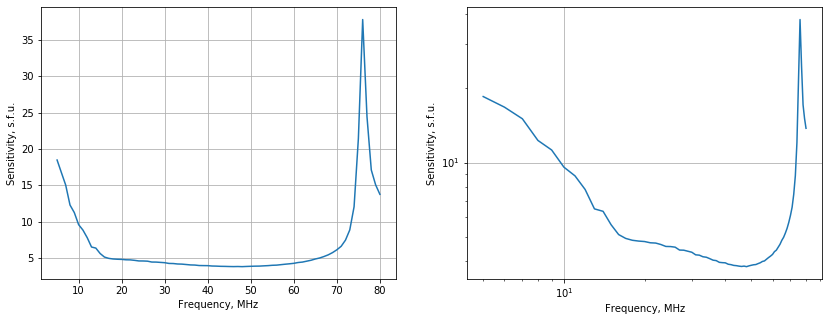

In [33]:
fig, ax = plt.subplots(1,2, facecolor = 'white', figsize = (14,5))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.08)
    
ax[0].plot(freq, dS * pow(10,22))
ax[0].grid(True)
ax[0].set_xlabel('Frequency, MHz')
ax[0].set_ylabel('Sensitivity, s.f.u.')

ax[1].loglog(freq, dS * pow(10,22))
ax[1].grid(True)
ax[1].set_xlabel('Frequency, MHz')
ax[1].set_ylabel('Sensitivity, s.f.u.')

plt.show()

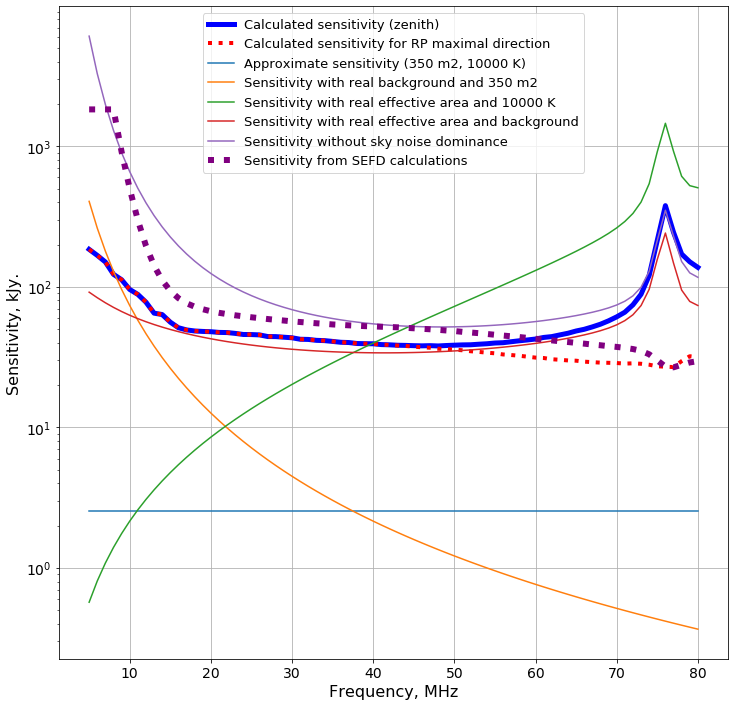

In [34]:
fig = plt.figure(facecolor = 'white', figsize = (12,12))
ax = fig.add_subplot(111)
plt.semilogy(freq, dS * pow(10,23), label = 'Calculated sensitivity (zenith)', color = 'blue', linewidth = '5.0')
plt.semilogy(freq, dS_Max * pow(10,23), linestyle = ':', linewidth = 4, color = 'red', label = 'Calculated sensitivity for RP maximal direction') 
plt.semilogy(freq, dS_rough * pow(10,23), label = 'Approximate sensitivity (350 m2, 10000 K)')
plt.semilogy(freq, dS_BG * pow(10,23), label = 'Sensitivity with real background and 350 m2')
plt.semilogy(freq, dS_Ae * pow(10,23), label = 'Sensitivity with real effective area and 10000 K')
plt.semilogy(freq, dS_AB * pow(10,23), label = 'Sensitivity with real effective area and background')
plt.semilogy(freq, dS_NN * pow(10,23), label = 'Sensitivity without sky noise dominance')
plt.semilogy(freq, dS_SEFD * pow(10,0), label = 'Sensitivity from SEFD calculations', linestyle = ':', linewidth = 6, color = 'purple')

plt.legend(loc = 'upper center', fontsize = 13)

ax.set_xlabel('Frequency, MHz', fontsize = 16)
ax.set_ylabel('Sensitivity, kJy.', fontsize = 16)

ax0 = plt.gca()
ax0.tick_params(axis = 'both', which = 'major', labelsize = 14)
ax0.tick_params(axis = 'both', which = 'minor', labelsize = 16)

plt.grid(True)

In [35]:
SEFD_Cane = NoiseFactor * Tbg_Cane * 2 * kB / (Aeff0)
SEFDmax_Cane = NoiseFactor * Tbg_Cane * 2 * kB / (AeffMax)
SEFD_Krymkin = NoiseFactor * Tbg_Krymkin * 2 * kB / (Aeff0)
SEFDmax_Krymkin = NoiseFactor * Tbg_Krymkin * 2 * kB / (AeffMax)

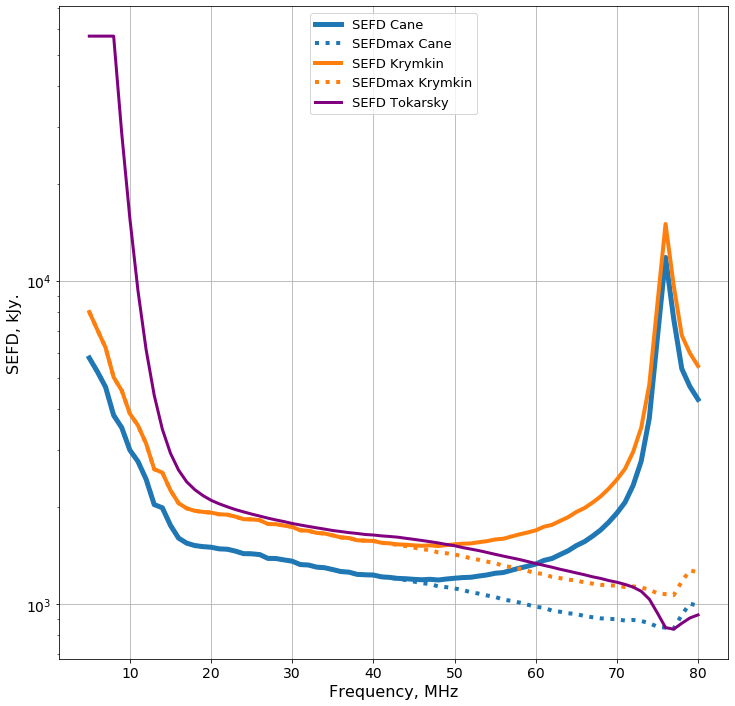

In [36]:
fig = plt.figure(facecolor = 'white', figsize = (12,12))
ax = fig.add_subplot(111)
plt.semilogy(freq, SEFD_Cane * pow(10,23), label = 'SEFD Cane', linewidth = 5, color = '#1f77b4')
plt.semilogy(freq, SEFDmax_Cane * pow(10,23), label = 'SEFDmax Cane', linewidth = 4, linestyle = ':', color = '#1f77b4')
plt.semilogy(freq, SEFD_Krymkin * pow(10,23), label = 'SEFD Krymkin', linewidth = 4, color = '#ff7f0e')
plt.semilogy(freq, SEFDmax_Krymkin * pow(10,23), label = 'SEFDmax Krymkin', linewidth = 4, linestyle = ':', color = '#ff7f0e')
plt.semilogy(freq, SEFD * pow(10,0), label = 'SEFD Tokarsky', linewidth = 3, color = 'purple')

plt.legend(loc = 'upper center', fontsize = 13)

ax.set_xlabel('Frequency, MHz', fontsize = 16)
ax.set_ylabel('SEFD, kJy.', fontsize = 16)

ax0 = plt.gca()
ax0.tick_params(axis = 'both', which = 'major', labelsize = 14)
ax0.tick_params(axis = 'both', which = 'minor', labelsize = 16)

plt.grid(True)

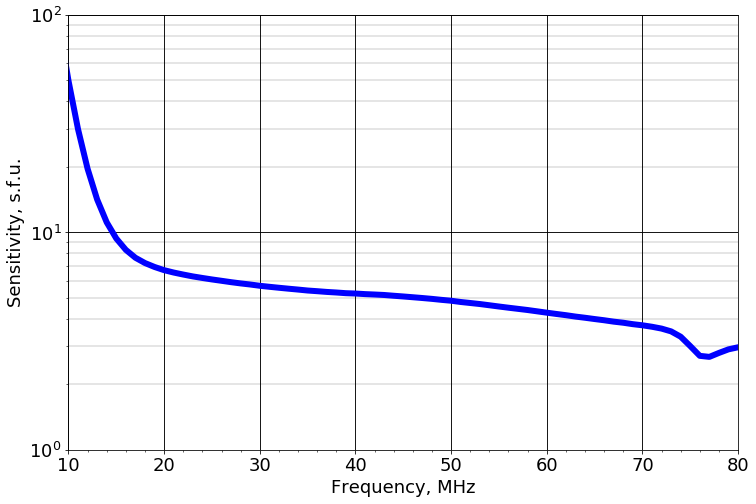

In [37]:
fig = plt.figure(facecolor = 'white', figsize = (12,8))
ax = fig.add_subplot(111)
plt.semilogy(freq, dS_SEFD * pow(10,-1), label = 'Sensitivity from SEFD calculations', linestyle = '-', linewidth = 6, color = 'blue')
ax.set_xlabel('Frequency, MHz', fontsize = 18)
ax.set_ylabel('Sensitivity, s.f.u.', fontsize = 18)
plt.axis([10,80, 1, 100])
ax0 = plt.gca()
ax0.tick_params(axis = 'both', which = 'major', labelsize = 18)
ax0.tick_params(axis = 'both', which = 'minor', labelsize = 18)
ax0.minorticks_on()
# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.9', color='black')
# Customize the minor grid
ax.grid(which='minor', axis = 'y', linestyle='-', linewidth='0.2', color='black')

plt.grid(True)
#pylab.savefig('Sensitivity'+'.eps', bbox_inches='tight', dpi = 40)
        